In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

C:\Users\My PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


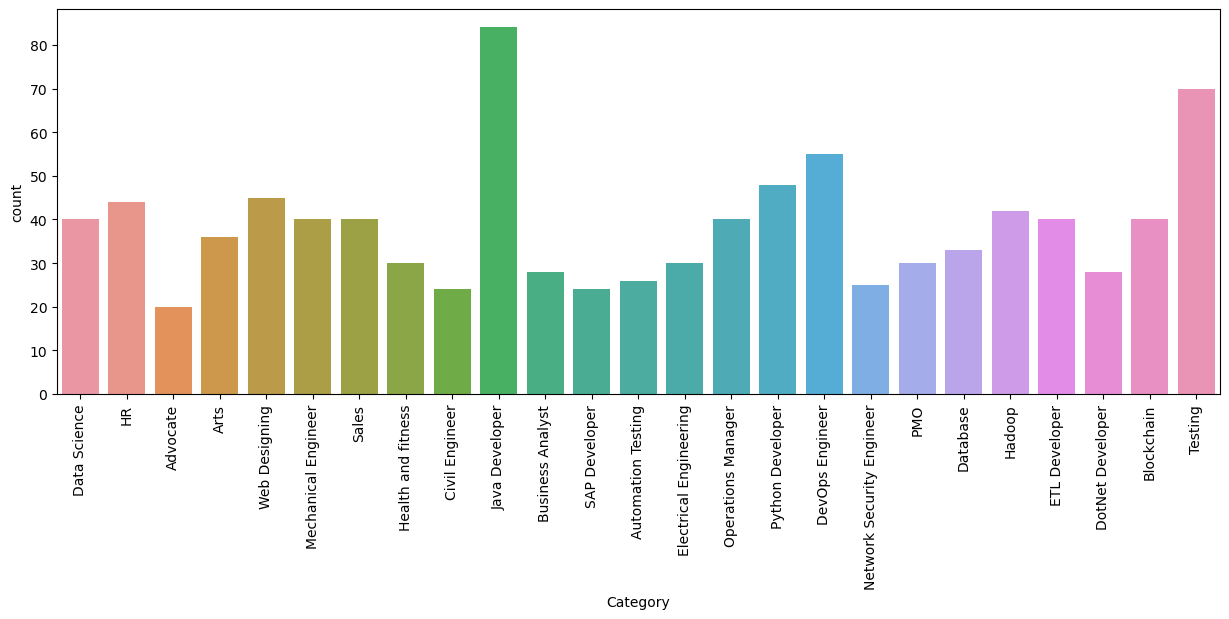

In [6]:
plt.figure(figsize= (15,5))
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
plt.show()

# Exploring Resume

In [7]:
df['Category'][0]

'Data Science'

In [8]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

# Cleaning data 

1.URLS


2.hashtags


3.Mentions


4.special characters


5.punctuation marks


In [9]:
import re

def cleanResume(txt):
    # Replace URLs with a space and add a newline
    cleanText = re.sub(r'http\S+', ' ', txt)
    
    # Replace 'RT' and 'cc' with a space and add a newline
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    
    # Replace hashtags with a space and add a newline
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    
    # Replace mentions with a space
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    
    # Replace special characters with a space
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    
    # Replace non-ASCII characters with a space
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    
    # Replace multiple spaces with a single space
    cleanText = ' '.join(cleanText.split())
    
    # Add an extra space after each word
    cleanText = ' '.join(cleanText.split())  # Add this line
    
    return cleanText


In [10]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x) )

In [11]:
df['Resume'][1]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

# words into categorical value

In [12]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()


In [13]:
le.fit(df['Category'])
df['Category']= le.transform(df['Category'])

In [14]:
df
#data science,java etc named into numbers


,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive t...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# Vactorization

In [15]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words= 'english')

tfidf.fit(df['Resume'])
requeriedtext = tfidf.transform(df['Resume'])

In [17]:
requeriedtext


<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# splitting data 

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split( requeriedtext, df['Category'], test_size=0.2, random_state=42)

In [20]:
X_train.shape

(769, 7351)

In [21]:
X_test.shape

(193, 7351)

# train the model and classify the report 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
ypred =  clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9844559585492227


C:\Users\My PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


# predictive system

In [37]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [28]:
your_resume = """ Professional Experience
Data Analyst intern, INVENTRON TECHNOLOGIES AND
BUSINESS SOLUTION LLP
October 2022 – December 2022 | Bangalore, India
•Performed data collection, cleansing, and analysis using
Python and SQL in a data analyst internship.
•Extracted actionable insightsfrom various projects, aiding
data-driven cost reduction and revenue optimization efforts.
Machine learning with python intern, Pie Infocomm pvt ltd
April 2022 – June 2022 | remote
•Developed and deployed machine learning modelsto solve
real-world problemsin customersegmentation and fraud
detection.
•Worked with a team of experienced machine learning
engineers using Python and TensorFlow.
Projects
Using-RFM-Model-for-Customer-Segmentation
•Implemented the RFM model to analyze customer behavior,
segmenting 10,000+ customersinto distinct groups based on
purchase frequency, monetary value, and recency; optimized
marketing strategiesresulting in a 20% increase in customer
retention and a 15% boost in revenue.
Exploratory-Data-Analysis-EDA-FOR-ONLINE-RETAILS
•Conducted comprehensive exploratory data analysis on online
retailsales data, employing advanced data cleaning,statistical
analysis, and visualization techniques. Uncovered actionable
insightsthat drove informed decision-making and resulted in
substantial business performance improvements, including a
20% increase in revenue and a 15% reduction in customer
churn.
NLP-SENTIMENT-ANALYSIS-
•Developed and implemented a robust NLP sentiment analysis
framework, encompassing advanced data preprocessing
techniques,sentiment classification algorithms, and machine
learning methodsto automatically determine the sentiment of
text, resulting in accurate sentiment labeling for customer
reviews and feedback.
Publications
Revolutionizing Urban Mobility: A Data-Driven Approach to
Traffic Forecasting and Management, ZENODO.ORG
September 21st, 2023
Programming Language
Python (NumPy, pandas,scikit-learn)
Data Analysis
Data Cleaning, Data Visualization,
Statistical Analysis
Analytical Skills. Data
Visualization. Statistical Analysis.
Business Acumen. Data
Management. Excel Skills.
Problem-Solving. Communication.
Project Management. AWS
Knowledge. Coding Skills
(Optional). Attention to Detail.
Innovation. Adaptability. Team
Collaboration
Certificates
Data Science for Python
Machine Learning with Python
Data Analysis with Python
Python Essentials
"""

In [36]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(your_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]
# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
